# Python library: Scikit-Learn


All machine learning models in scikit-learn are implemented as python classes.     
These classes serves 2 purposes:     
1) they implement the algorithms for learning and predicting     
2) store all the information that is learned from the data     

**Training** a model on the data is also called fitting the model to the data:     
In scikit-learn, we use the .fit() method.      

To **predict** the label of an unlabeled data point:     
In scikit-learn, we use the .predict() method.      


## 0. Machine learning

Giving computers the ability to learn to make decisions from data *without being explicitly programmed*.     


### 0.1 Supervised learning VS Unsupervised learning VS reinforcement learning

**Supervised learning** uses labeled data, an example will be learning if an email is spam or not. The label of each data is *spam* or *not spam*.    

**Unsupervised learning** uncovers hidden patterns and structures from unlabeled data.    
e.g. a bussiness may wish to group its customers into distinct categories base on their purchasing behavior, *without* knowing in advance what these categories maybe. (Clustering)    

In **reinforcement learning** the machine or software agent interact with an environment. The reinforcement agent are able to automatically figure out how to optimise their behavior, *given a system of reward or punishment*. It draws inspiration from behavioral psychology.    


### 0.2 Naming conventions

features == predictor variables == independent variables    

target variable == dependent variable == response variable    



## 1. Supervised learning

There are several data points (or samples) described using predictor variable (or features) and a target variable.    
Data usually presented in a table, row for each data points and column for each feature.     
The aim of supervised learning is to build a model that is able to predict the target variable, given the predictor variables.    
e.g. given the Iris flower data set, the taget variable can be the species (setosa etc.), given the sepal length/petal length/width (predictor variables).     

If the target variable consist of categories, like "click" or "no click", "spam" or "not spam", or different species of flowers, we call the learning task **Classification**.     

If the target is a continuously varying variable, for example, the price of a house, then it is a **Regression** task.     
Purpose of supervised learning:     
1) automate time-consuming or expensive maual tasks (e.g. doctor's diagnosis)       
2) make predictions about future (e.g. if a customer will click on an add)     

**Need** labeled data, you can get it from:          
1) historical data which already has labels that you are interested in.       
2) perform experiments to get labeled data. (e.g. A/B testing to see how many clicks you get)      
3) crowdsourced labeling data.       

The goal of supervised learning is to learn from data for which the right output is known, so that we can make predication o new data for which we don't know the output.     




In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

**Note on the Iris dataset**     
It describe the Iris flower which the **features** consist of 4 measurements:    
1) petal length     
2) petal width     
3) sepal length      
4) sepal width      
and the **target** variable encodes the species of flower and thereare 3 possibilities:     
1) versicolor     
2) virgincia     
3) setosa      


In [2]:
iris = datasets.load_iris()

In [3]:
type(iris) #Bunch object, similar to a dictionary, contains k-v pairs

sklearn.utils.Bunch

In [4]:
print(iris.keys())
# DESCR: provide a description of the data set
# data: contains the values of features
# target: target data

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
# both feature and target data are provided as NumPy arrays
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
# 150 rows and 4 cols in features data
iris.data.shape
#150 samples with 4 features (petal/sepal length/width)

(150, 4)

target variable is encoded as:     
setosa == 0      
versicolor == 1       
virginica == 2

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 2. Exploratory data analysis (EDA)

In [8]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


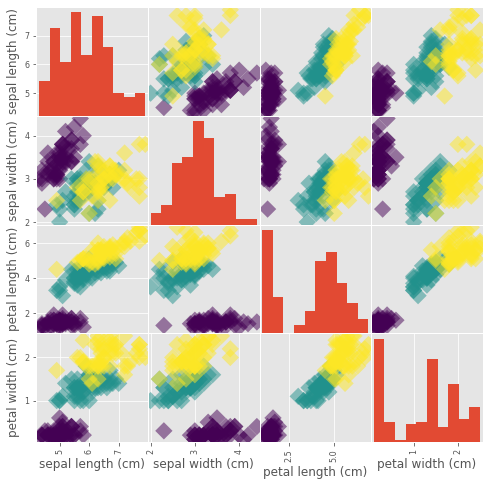

In [9]:
_ = pd.plotting.scatter_matrix(df,c = y , figsize = [8,8], s=150, marker = "D")
# target variable to c (color), ensure our data points in fig will be colored by their species
# s: marker size, marker : shape

The results is a matrix of figures.      
Diagonal are histogram of the features corresponding to the row and column.     
Off-diagonal figures are scatter plots of the column features versus row features colored by target variable

## 3. Classification (supervised)

**The challenge**:     
We would like to build a classifier that takes unlabeled data as input and outputs a label.     
We first need to choose a type of classifier and it needs to learn from the already labeled data (training data).      


### 3.1 k-Nearest Neighbors (KNN)

Basic idea:     
To predict the label of any data point by looking at the k (e.g. 3) closest labeled data points and getting them to (majority) vote on what label the unlabeled point should have.     

Notice we named the feature array X and response variable y: This is in accordance with the common scikit-learn practice.    

Larger k = smooth decision boundary and less curvy = less complex model = can lead to underfitting
Smaller k = more complex model = can lead to overfitting     

**Small** k can lead to sensitive to noise in the specific data we have, rather than relecting general trends in the data.         

**Large** k can make model even simpler, then model will perform less well on both test and training set.(i.e. the testing and training accuracy will drop, the graph that shows testing and training accuracy vs k is called model complexity curve). This is called underfitting.     





In [10]:
from sklearn.neighbors import KNeighborsClassifier
#instantiate the classifier, set no. of neightbor to 6
knn = KNeighborsClassifier(n_neighbors=6)
#fit this classifier to our training set, the labeled data
# sklearn API requires data as np array or pd df, features takes on continuous value (as oppose to categorical data)
# requires no missing values in the data
# sklearn requires each col is a feature, each row a diff observation or data point
# target needs to be a single col with the same number of observation as the feature data
knn.fit(iris["data"],iris["target"]) #X,y
# The above returns the classifier itself and modifies it (knn object) to fit it to the data. 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [11]:
# predict unlabeled data
# set of observation X_new
# API requires data as np array with feature in col and observations in rows

In [12]:
X_new = np.array([[4.7,3.1,1.2,0.2],[5.0,3.6,1.4,0.2],[5.6,4.1,1.8,0.4]]) #new observation to be labeled
print(X_new.shape)
prediction = knn.predict(X_new)
print("Prediction {}".format(prediction)) # all setosa prediction

(3, 4)
Prediction [0 0 0]


### 3.2 Measuring model performance

In classification problems, accuracy is a commonly-used metric.     
Accuracy = Fraction of correct predictions. (i,e, no. of correct prediction / total no. of data points)      

It is common to split data into 2 sets:     
1) training set (fit or train)     
2) test set (predict on the labeled test set)      
then compare these predictions with the known labels.      



In [13]:
from sklearn.model_selection import train_test_split
# use the train_test_split function to randomly split our data
# 1st arg: feature data
# 2nd arg: targets or label
# test_size: what proportion of the original data is used for the test set
# random_state: sets a seed for the RNG that splits the data into train and test
# this func returns 4 array
# by default, the split is 75% training data, 25% test data
# stratify: labels to be distributed in train and test tests as they are in the original data set. To keep track
X = iris["data"] # already a np array, if its df then use .values to convert to array. df will also works
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21,stratify=y)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [14]:
# check accuracy, use .score() method
knn.score(X_test, y_test)

0.9555555555555556

## Example: the digits recognition dataset

In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9. A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.    

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise.     

On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

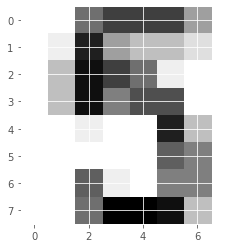

In [15]:
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010 (1010th image)
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [16]:
print(digits.target.shape)

(1797,)


In [17]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

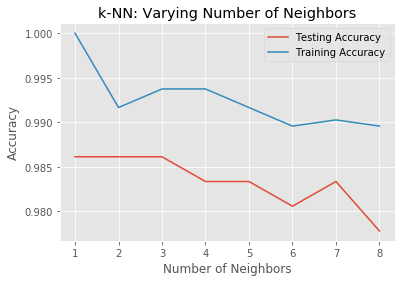

In [18]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## 4. Regression (supervised)

The target value is continuous varying variable, such as a country's GDP or price of a house.    

Regression mechanics:    
y = ax + b      
y = target     
x = single feature      
a,b = parameters of model we want to learn      

How do we choose a and b?    
A common method is to define an error function for any given line and then to choose the line that minimizes the error function.     
For linear regression, this lost function is Ordinary least squares (OLS): minimize sum of squares of residuals.     

When you call .fit() on a linear regression model in scikit-learn, it performs this OLS under the hood.    

When we have 2 features and 1 target, a line is of the form:      
$y = a_1x_1 + a_2x_2 + b$
which need to spcified 3 variables to fit a linear regression model.($a_1a_2b$)      

For higher dimension:     
$y=a_1x_1 + a_2x_2 + a_3x_3 + ... + a_n x_x +b$      
must specify coefficient for each feature and the variable b.      

Scikit-learn API works exactly the same way: passing two arrays: feature, and target.     

In general, you will never use linear regression out of the box, you will most likely wish to use regularisation that place further constraints on the model coefficients.    




In [19]:
# boston housing data
boston = pd.read_csv("../Machine_Learning_basics/data/boston.csv")
print(boston.head())
# CRIM: per capita crime rate
# NX: nitri oxide concentration
# RM: avg no. of rooms per dwelling
# target: MEDV: median value of owner occupied homes in thousand of dollors

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [20]:
# creating df for X and y
# drop target, get df for features
X = boston.drop("MEDV", axis=1).values #convert to np array with .values
# keep only the target
y = boston["MEDV"].values

In [21]:
# predict price from a single feature: the avg no. of rooms in a block
# slice out no. of rooms col
X_rooms = X[:,5] #np array

# turn them into arrays of desired shape, use reshape
y = y.reshape(-1,1) #-1 basically means unknown, this line only tell np to have 1 col, np has to figure out how many row to be compatible witht he original array
X_rooms = X_rooms.reshape(-1,1)

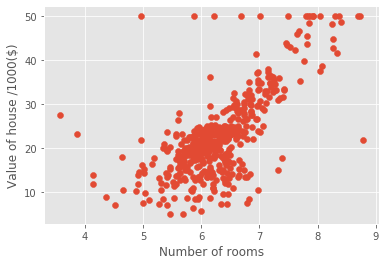

In [22]:
# plot house value as a func of no. of rooms
plt.scatter(X_rooms, y)
plt.ylabel("Value of house /1000($)")
plt.xlabel("Number of rooms")
plt.show()

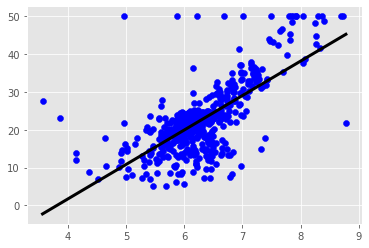

In [23]:
# linear regression model
from sklearn import linear_model
#instantiate LinearRegression as reg
reg = linear_model.LinearRegression()

#fit the regressor to the data
reg.fit(X_rooms, y)

#check out the regressors prediction over the range of data
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)
#data set
plt.scatter(X_rooms, y, color="blue")
#predict over the range of the training dataset
plt.plot(prediction_space, reg.predict(prediction_space),color="black", linewidth=3)

plt.show()

### 4.1 Measuring model performace

The default scoring method for linear regression is called R squared.    
This metric quantifies the amount of variance in the target variable that is predicted from the feature variables (Explaned variance/Total variance). Higher the better.     


In [24]:
# linear regression on all features (high dimension fit)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
#instantiate the regressor
reg_all = linear_model.LinearRegression()

reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

#R squared
reg_all.score(X_test, y_test)

0.7112260057484953

In addition to computing the R square score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. 

In [25]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 4.6386899261728045


### 4.2 Cross-validation

The R squared returned is dependent on the way that you split up the data.     
Not representative of the model's ability to generalise.     
We can use cross-validation!      

1) split the dataset into 5 groups or folds      
2) we hold out the first fold as a test set, fit our model on the remaining four folds, predict on the test set and compute the metric of interest     
3) hold out 2nd fold as test data, fit the model with the remaining data, compute the metric of interest       
4) As a result, we will have 5 values of R squared from which we can compute metric of interest (mean, median, 95% confidence intervals)        
5) This is called 5 fold Cross-Validation     

Or k-fold CV in short for split into k folds.      


In [26]:
from sklearn.model_selection import cross_val_score
#instaniate regressor
reg = linear_model.LinearRegression()

#this returns an array of CV scores, length of array is no. fold used
# value reported is R squared, default
cv_results = cross_val_score(reg,X,y, cv=5)

print(cv_results)
print(np.mean(cv_results))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
0.3532759243958813


### 4.3 Regularised regression (supervised)

Linear regression try to minimise the loss function to choose a coefficient $a_i$ for each feature variable.     
Large coefficient can lead to overfitting.      
Therefore it is common practice to alter the loss function so that it penalises for large coefficients, i.e. **regularisation**.     

**Ridge Regression**: (usually first choice)      
Loss function is the standard OLS function plus the squred value of each coefficient multiplied by some constant alpha:    
$\text{Loss function} = \text{OLS loss function} + \alpha \sum^{n}_{i=1} a^{2}_{i}$    

Thus when minimising the loss function to fit the our data, models are penalised for coefficient with a large magnitude (both positively or negatively large).    
we need to choose $\alpha$ in order to fit and predict.     
Picking $\alpha$ is similar to picking k in knn, which is called hyperparameter tuning.    
$\alpha=0$: get back OLS (can lead to overfitting)     
Very large $\alpha$: lead to simple model and lead to underfitting.     

**Lasso Regression**:    
Loss function isthe standard OLS plus the absolute value of each coefficient multiplied by some constant $\alpha$:    

$\text{Loss function} = \text{OLS loss function} + \alpha \sum^{n}_{i=1} |a_{i}|$   

Lasso regression can be used to select import feature of a dataset.     
This is because it tends to shrink the coefficients of less important features to be exactly 0.     
The features whose coefficients are not shrunk to 0 are "selected" by the Lasso algorithm.     


In [27]:
# Ridge regression
from sklearn.linear_model import Ridge

X_trian, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
#instantiate
ridge = Ridge(alpha=0.1, normalize=True) # norm: all our variables on the same scale
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127315

In [28]:
# Lasso regression
from sklearn.linear_model import Lasso

X_trian, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
#instantiate
lasso = Lasso(alpha=0.1, normalize=True) # norm: all our variables on the same scale
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.5950229535328551

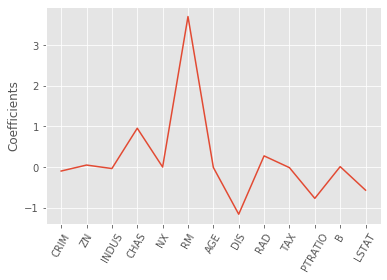

In [29]:
# Lasso regression: feature selection
from sklearn.linear_model import Lasso

# store feature names in the variable names
names = boston.drop("MEDV",axis=1).columns

#instantiate regressor
lasso = Lasso(alpha=0.1)

#fit and then extract the coef attribute and store it
lasso_coef = lasso.fit(X,y).coef_

#plotting the coefficient as a function of features yields this fig
_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)),names, rotation = 60)
_ =plt.ylabel("Coefficients")
plt.show()

## Example: Gapminder

In [30]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv("../Machine_Learning_basics/data/gm_2008_region.csv")

# Create arrays for features and target variable
y = df["life"].values
X_fertility = df["fertility"].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X_fertility = X_fertility.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (506, 13)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (506, 13)


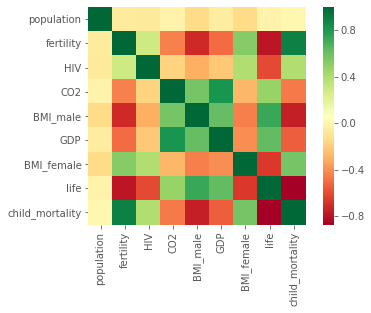

In [31]:
# correlation between features
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

0.6192442167740035


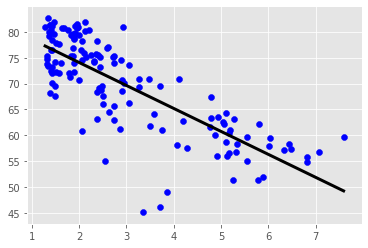

In [32]:
# Create the regressor: reg
reg = linear_model.LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.scatter(X_fertility,y, color="blue")
plt.show()


## 5. Classification metric

Sometimes accuracy (fraction of correctly classified samples) might not be the best metric. e.g. a spam classification problem in which 99% of emails are real and only 1% are spam. A model that classifies all emails as real will give 99% accuracy, not very helpful.     

This situation when one class is more frequent is called class imbalance, because the class of real emails contains way more instances than the class of spam. It is pretty common in practice and often we need more nuanced metrics.    

Given a binary classification problem, we can draw up a 2x2 matrix called the confusion matrix.     

| confusion matrix | predicted: spam | predicted: real |
| ---------------- | ----------------|-----------------|
|actual: spam       | True Pos (TP)  | False Neg (FN)    |
| actual : real     | False Pos (FP) | True Neg (TN)    |      


What's positive and negative is up to us. We can think of it as:     
1) if it is predicted correctly, it is **True**      
2) if it is aligned with the goal (purpose) of the programe, it is **Positive**     

Some metrics we can get from the confusion matrix:     
1) Accuracy:    $\frac{TP + TN}{TP + TN + FP + FN}$     
2) Precision (positive predictive value or PPV):    $\frac{TP}{TP+FP}$       
3) Recall (sensitivity hit rate or true positive rate):    $\frac{TP}{TP+FN}$       
4) Fa score (harmonic mean of precision and recall):   $2 \times \frac{\text{precision}\times\text{recall}}{\text{precision}+\text{recall}}$       
5) High precision means that our classifier had a low false positive rate, i.e. not many real emails were predicated being spam.     





In [41]:
# e.g. the Iris data set
# note that this has 3 targets, should be binary , but the syntax is the same
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
X = iris["data"] # already a np array, if its df then use .values to convert to array. df will also works
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21,stratify=y)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#confusion matrix
print(confusion_matrix(y_test,y_pred)) #true label, prediction label

print(classification_report(y_test, y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



The support gives the number of samples of the true response that lie in that class - so in the video example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.     

Here, you'll work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes

In [42]:
df_diabetes = pd.read_csv("../Machine_Learning_basics/data/diabetes.csv")
X = df_diabetes.drop("diabetes", axis=1)
y = df_diabetes["diabetes"]

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



## 6. Logistic Regression (log reg) (supervised)

Despite its name, logistic regression is used in classification problems, **NOT** regression problems.     
For binary classification, that is, when we have two possibile labels for the target variable.     
Given one feature, logistic regression will output a probability, p, with respect to the target variable.     
if p > 0.5: we label the data as 1      
if p < 0.5: we label the data as 0     
Note that log reg produces a linear decision boundary.    
By default, log reg threshold = 0.5     

When the threshold = 0, the model predicts 1 for all, which means that both True and False positive rates are 1.   
When the threshold = 1, the model predicts 0 for all, which means that both True and False positive rates are 0.     

If we vary the threshold between these 2 extremes, we a series of different false positive and true positive rates.    
If we try all possible threshold is called the Receiver Operating Characteristic curve or ROC curve.     



[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


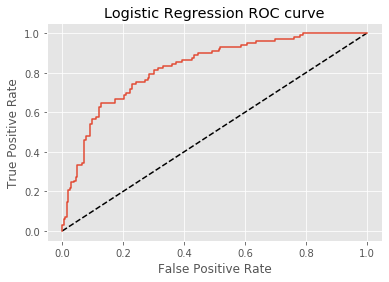

In [46]:
#e.g.
from sklearn.linear_model import LogisticRegression

#instantiate the classifier
logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

logreg.fit(X_train, y_train)
#default p=0.5, this shows the binary prediction
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# ROC curve
from sklearn.metrics import roc_curve

# use predict_proba method to the model and pass the test data
# predict_proba returns an array with 2 col
# each col contains the probability for the respective target values
# 1st col is the probability of the predicted labels being 0
# 2nd col is the probability of the predicted labels being 1
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# first arg is given by actual labels, 2nd arg is by predicted probability
# unpack: false positive rate (fpr), true positive rate (tpr) and threshold
# use predicted probability of the model assigin a value of 1 to the observation in question
# to compute the ROC we do not just want the prediction on the test set, but we want the probability that our
# log reg model outputs b4 using a threshold to predict the label.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC curve")
plt.show()

### 6.1 Area under the ROC curve

Given the ROC curve, can we extract a metric of interest ?    

The larger area under the ROC curve = better model     

If we have a model which produced an ROC curve that had a single point at 1,0 (the upper left corner), representing a true positive of 1 and a false postive rate of 0, this would be a great model.     

Therefore, the area under the ROC curve, or AUC is another popular metric for classification models.    



In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_pred_prob)

/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8268608414239482

In [50]:
#AUC using cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5, scoring = "roc_auc")

print(cv_scores)

[0.7987037  0.80777778 0.81944444 0.86622642 0.85037736]


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

## 7. Hyperparameter tuning

Linear regression: choosing parameters (the algorithms find the best a and b)     
Ridge/lasso regression: choosing alpha      
k-Nearest Neighbours: choosing n_neighbors      

Such parameters (k and alpha), ones that need to be specified before fitting a model, are called **hyperparameters**.     
These are the parameters that cannot be explicitly learned by fitting the model.     

A fundamental key for building a successful mode -> choosing the correct hyperparameter:     
1) try a bunch of different hyperparamter values      
2) fit all of them separately      
3) see how well each perform    
4) choose the best one     
This is called hyperparameter tuning.     

It is essential to use cross-validation as using tran_test_split alone would risk overfitting the hyperparameter to the test set.     

**Grid search cross-validation**:       

If we have two hyperparameters, C and alpha, the grid of values to test could look like (x-axis is alpha, y-axis is C):     

|0.5 | 0.701 | 0.703 | 0.697 | 0.696|
| ----| ---- | ------ | ----- | ----|
|0.4| 0.699 | 0.702| 0.698 | 0.702 |
|0.3 | 0.721 | 0.726 | 0.713 | 0.701 |
|0.2 | 0.696 | 0.702 | 0.704 | 0.701|
|0.1 | 0.698 | 0.692 | 0.688 | 0.675 |
|    | 0.1 | 0.2 | 0.3| 0.4 |    

For each data point, we perform k-fold CV for the 2 hyperparamters and choose the best (in this case C = 0.3, alpha = 0.2 as it gives the highest value of R square)      

**Randomized search cross-validation**:     
 
GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. Randomized search will never outperform GridSearchCV, but it saves on computation time.

In [53]:
from sklearn.model_selection import GridSearchCV

#specifies the hyperparameter
# if there is more than 1 hyperparameter, all possible combinaiton will be tried
param_grid = {"n_neighbors": np.arange(1,50)}

knn = KNeighborsClassifier()

# return a GridSearch object (GridsearchCV is a class)
knn_cv = GridSearchCV(knn, param_grid, cv=5)

#fit to data and this fit performs the actual grid search in place
knn_cv.fit(iris["data"],iris["target"])

#attribute
print(knn_cv.best_params_)

#best mean best validation score over the folds
print(knn_cv.best_score_)

{'n_neighbors': 6}
0.98


Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

In [54]:
df_diabetes = pd.read_csv("../Machine_Learning_basics/data/diabetes.csv")
X = df_diabetes.drop("diabetes", axis=1)
y = df_diabetes["diabetes"]

# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.7708333333333334


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.     

Here, you'll also be introduced to a new model: the Decision Tree. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.

In [55]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 2}
Best score is 0.7447916666666666


## 8. Hold-out set of final evaluation

Similar concept to train_test_split, just that for this time the test set is the hold-out set     

How well can the model perform on never seen before data ?    
Using ALL data for cross-validation is not ideal.     

Split data into training and hold-out set at the begining      
Perform grid search cross-validation on training set to tune the model's hyperparameters      
Choose the best hyperparameters and use on the hold-out set, which has not been used before      





**Example**      

You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as X and y.      

In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

In [56]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {"C": c_space, "penalty": ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 9. Preprocessing data


### 9.1 Categorical data

scikit-learn will not accept categorical features by default (usually they can be strings, but sklearn only accepts numerical categorical data like 0,1)     

Therefore need to encode categorical features numerically.    

We can split the feature into a number of binary features called "dummy variables".     
one for each category: 0 means the observation was not that category, while 1 means it was.     

Say if the automobile data set has a "origin" feature with 3 different possible values "US", "Asia" and "Europe". We can create binary features for each of the origins as each car is made exactly 1 country:      

| origin_Asia | origin_Europe | origin_US |
| -------- | -----------| ------------|
|  0    |     0      |   1    |
|  0    |     1     |   0     |
|  1    |     0      |   0     |     

We actually only need two features instead of three. so we can delete the Europe col.

| origin_Asia | origin_US |
| -------- |------------|
|  0    |      1    |
|  0    |       0     |
|  1    |       0     |     

To create dummy variable we can use:     
scikit-learn: OneHotEncoder()      
pandas: get_dummies()  

In [59]:
df_auto = pd.read_csv("../Machine_Learning_basics/data/auto.csv")
df_auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [60]:
# target variable: mpg, miles per gallon
# categorical feature: origin
df_origin = pd.get_dummies(df_auto)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [61]:
# remove redundancy
df_origin = df_origin.drop("origin_Asia", axis=1)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


## Example: gapminder dataset

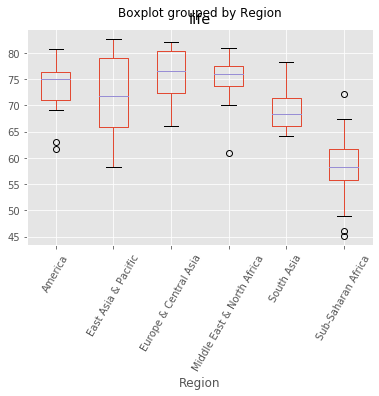

   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  


In [63]:
#example: gapminder
# Read 'gapminder.csv' into a DataFrame: df
df_all = pd.read_csv("../Machine_Learning_basics/data/gm_2008_region.csv")

# Create a boxplot of life expectancy per region
df_all.boxplot("life", "Region", rot=60)

# Show the plot
plt.show()

print(df_all.head())

scikit-learn does not accept non-numerical features. You saw in the previous exercise that the 'Region' feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the 'Region' feature.

In [64]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df_all)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
# drop the redundant
df_region = pd.get_dummies(df_all,drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [65]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

y = df_region["life"].values
X = df_region.drop("life", axis = 1).values

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5,normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X,y,cv=5)

# Print the cross-validated scores
print(ridge_cv)


[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


### 9.2 Handling missing data

Data is missing when there is no value for a given feature in a particular row.    
Missig values can be encoded in many ways such as 0, ? or -1.    



In [66]:
df_diabetes = pd.read_csv("../Machine_Learning_basics/data/diabetes.csv")
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [67]:
df_diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
# make all these 0 entry NaN
df_diabetes.insulin.replace(0,np.nan, inplace=True)
df_diabetes.triceps.replace(0,np.nan, inplace=True)
df_diabetes.bmi.replace(0,np.nan, inplace=True)
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [ ]:
# drop missing data, but too many row will be dropped
df_diabetes = df_diabetes.dropna()


In [69]:
# imputing missing data, i.e. educated guess
# compute the mean of the non-missing entries
# example using gapminder uses SimpleImputer
from sklearn.preprocessing import Imputer

# instantiate an instance of the Imputer
# also known as transformers
imp = Imputer(missing_values="NaN", strategy="mean", axis=0) #along col

# transform data
imp.fit(X)
X = imp.transform(X)


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### 9.3 Imputing within a pipeline

**The pipeline workflow**:      
It is a repeatable way to go from raw data to trained model.     
The pipeline object takes sequential list of steps where the output of one step is input to next step.      
Each step is represented by a 2-turple, with a name for the step, that is simply a string, and an object that implements the .fit() and the .transform() methods.     
You can have a sub pipeline as one of the steps.    
The beauty of the pipline is that it encapsulates every transformation from raw data to a trained model.

transform and then perform modelling with pipeline     
Each step but the last one must be a transformer     
Last step must be an estimator, such as a classifier or a regressor     


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values="NaN", strategy="mean", axis=0) #along col
logreg = LogisticRegression()

#build the pipeline object
# list of steps in the pipeline
# each step is a 2-tuple containing the name you wish for the step and the estimator
steps = [("imputation", imp), ("logistic_regression",logreg)]

#pass this list to the pipeline constructor
pipeline = Pipeline(steps)

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#fit pipeline to trainset
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

pipeline.score(X_test, y_test)

#See Voting dataset example below to see how pipeline works

/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### 9.4 Centering and scaling

Motivation:     
From the red wine quality data set below, we see that features (like acidity, pH and alcohol content) have wide range. Target variable is quality in this case.      

Many ML use some form of distance to inform them. If we have features on far larger scale, they can influence the model. e.g.k-NN uses distance explicitly.     

We want features to be on a similar scale.     
To achieve this, we do what is called normalizing (or scaling and centering)     

There are several way to normalise data:     
1) Standardisation: given any column, you can subtract the mean and divide by the variance so that all features are centerd around 0 and have variance 1.      
2) Subtract the minimum and divide by the range of the data so that the normalised dataset has minimum 0 and maxmum 1.   
3) Normalise so that data ranges from -1 to 1 instead.     



In [70]:
df_redwine = pd.read_csv("../Machine_Learning_basics/data/winequality-red.csv",delimiter=";")
print(df_redwine.head())
print(df_redwine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [71]:
#standardisation
#scaling in scikit-learn
from sklearn.preprocessing import scale

X = df_redwine[["fixed acidity","pH","alcohol"]].values
y = df_redwine["quality"].values
#y = y.reshape(-1,1)

X_scaled = scale(X)

print(np.mean(X))
print(np.std(X))
print(np.mean(X_scaled))
print(np.std(X_scaled))

7.351244527829893
3.208545966064839
1.0842553316164131e-15
1.0


In [74]:
# scaling in a pipeline
# need standardScaler class
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

steps = [("scaler",StandardScaler()),("knn",KNeighborsClassifier())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

knn_scaled = pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_test)

print(accuracy_score(y_test, y_pred))

#knn w/o scaling
knn_unscaled = KNeighborsClassifier().fit(X_train,y_train)
print(knn_unscaled.score(X_test,y_test))

0.54375
0.55


In [83]:
# search grid cross-validation with scaling in a pipeline
# superised ML
from sklearn.model_selection import GridSearchCV

steps = [("scaler",StandardScaler()),("knn",KNeighborsClassifier())]
pipeline = Pipeline(steps)

# specific hyperparameter space by a dict
# k: step name__hyperparameter name
# v: list or array try for that hyperparameter
parameters = {"knn__n_neighbors":np.arange(1,50)}

#cv set and hold-out set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

#gridsearch
cv = GridSearchCV(pipeline,param_grid=parameters)

cv.fit(X_train,y_train)

y_pred=cv.predict(X_test)

print(cv.best_params_)
print(cv.score(X_test,y_test))
print(classification_report(y_test,y_pred))

/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'knn__n_neighbors': 18}
0.58125
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.61      0.77      0.68       127
           6       0.55      0.60      0.57       131
           7       0.53      0.24      0.33        42
           8       0.00      0.00      0.00         3

    accuracy                           0.58       320
   macro avg       0.28      0.27      0.26       320
weighted avg       0.54      0.58      0.55       320



/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Example: Voting dataset



In [49]:
col_label = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df_vote = pd.read_csv("../Machine_Learning_basics/data/house-votes-84.csv",header=None, names=col_label)
dict_label = {"n":0,"y":1}
df_vote = df_vote.replace(dict_label)
print(df_vote.head())

        party infants water budget physician salvador religious satellite aid  \
0  republican       0     1      0         1        1         1         0   0   
1  republican       0     1      0         1        1         1         0   0   
2    democrat       ?     1      1         ?        1         1         0   0   
3    democrat       0     1      1         0        ?         1         0   0   
4    democrat       1     1      1         0        1         1         0   0   

  missile immigration synfuels education superfund crime duty_free_exports  \
0       0           1        ?         1         1     1                 0   
1       0           0        0         1         1     1                 0   
2       0           0        1         0         1     1                 0   
3       0           0        1         0         1     0                 0   
4       0           0        1         ?         1     1                 1   

  eaa_rsa  
0       1  
1       ?  
2       

In [50]:
# Convert '?' to NaN
df_vote[df_vote == '?'] = np.nan

# Print the number of NaNs
print(df_vote.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df_vote.shape))

# Drop missing values and print shape of new DataFrame
df_vote = df_vote.dropna()
df_vote = df_vote.reset_index(drop=True)

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df_vote.shape))

df_vote.head()

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
3,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
4,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [51]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values="NaN", strategy="most_frequent", axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [52]:
X = df_vote.drop("party",axis=1)
y = df_vote["party"]

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train,y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    democrat       0.97      0.97      0.97        36
  republican       0.97      0.97      0.97        34

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Example: white wine quality

In [84]:
pd_whitewine = pd.read_csv("../Machine_Learning_basics/data/white-wine.csv")
pd_whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [89]:
y = (pd_whitewine["quality"] < 5).map({True:True, False:False})
y = y.values
print(y)
X = pd_whitewine.drop("quality",axis=1).values
print(X)

[False False False ... False False False]
[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]


In [90]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))


Accuracy with Scaling: 0.964625850340136
Accuracy without Scaling: 0.9666666666666667


Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.        

You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are C and gamma. C controls the regularization strength. It is analogous to the C you tuned for logistic regression, while gamma controls the kernel coefficient

In [92]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.9693877551020408
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       951
        True       0.43      0.10      0.17        29

    accuracy                           0.97       980
   macro avg       0.70      0.55      0.58       980
weighted avg       0.96      0.97      0.96       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


In [97]:
# Read the CSV file into a DataFrame: df
df_gap = pd.read_csv("../Machine_Learning_basics/data/gm_2008_region.csv")
print(df_gap.head())
# Create arrays for features and target variable
X = df_gap.drop(["life","Region"],axis=1).values
y = df_gap["life"].values

   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  


In [105]:
from sklearn.linear_model import ElasticNet
from sklearn.impute import SimpleImputer
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline,param_grid=parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train,y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734.4148861851661, tolerance: 0.4518648363636364
  positive)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 762.6366738748761, tolerance: 0.5123628000000001
  positive)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 763.990191410857, tolerance: 0.4854468571428572
  positive)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888217


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 10. Log loss function

It is a loss function and it is a measurement of error.    
We want to minimise this error (unlike accuracy)    

Log loss for **binary** classification:    
actual value: y={1=yes,0=no}      
prediction (**probability that the value is 1**): p      
$\text{log loss} = -\frac{1}{N} \sum^{N}_{i=1}(y_i \log(p_i) + (1-y_i)\log(1-p_i))$     

For example:     
1) True label = 0, but we predict 1 with p = 0.9 -> logloss = 2.3      
2) True label = 1, but we predict 0 with p = 0.5 -> logloss = 0.69      

It is better to be less confident than it is to be confident and wrong.     


In [106]:
def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and 
    actual when these are 1D arrays.
    
    :param predicted: the predicted probability as floats between 0-1
    :param actual: the actual binary labels, either 0 or 1
    :param eps (optional): log(0) is inf, so we need to offset our predicted values slightly 
    from 0 or 1."""
    
    predicted = np.clip(predicted, eps, 1-eps)
    loss = -1 * np.mean(actual * np.log(predicted) + (1 - actual)*np.log(1 - predicted))
    
    return loss

In [110]:
print(compute_log_loss(predicted=0.9, actual=0))
print(compute_log_loss(predicted=0.5, actual=1))

2.302585092994046
0.6931471805599453


In [111]:
print(compute_log_loss(predicted=0.85, actual=1))
print(compute_log_loss(predicted=0.99, actual=0))
print(compute_log_loss(predicted=0.51, actual=0))

0.16251892949777494
4.605170185988091
0.7133498878774648


## 11. Multi-class classification VS Multi-label classication AND Imbalanced dataset

**Multiclass Classification**:   
A classification task with more than two classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. Multi-class classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time. This means that there is only 1 target variable (i.e. 1 label) in the table. (of course, with multiple features)        

**Multi-label Classification**:
multi-label classification are variants of the classification problem where *multiple labels* may be assigned to *each instance(data point)*. Multi-label classification is a generalization of multiclass classification, which is the single-label problem of categorizing instances into precisely one of more than two classes; in the multi-label problem there is no constraint on how many of the classes the instance can be assigned to. You can think of it as there are multiple target variable (the labels) assigend to each data point (each row in the table).          

**Imbalacned dataset**:      
Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. For example, you may have a 3-class classification problem of set of fruits to classify as oranges, apples or pears with total 100 instances . A total of 80 instances are labeled with Class-1 (Oranges), 10 instances with Class-2 (Apples) and the remaining 10 instances are labeled with Class-3 (Pears). This is an imbalanced dataset and the ratio of 8:1:1. Most classification data sets do not have exactly equal number of instances in each class, but a small difference often does not matter. There are problems where a class imbalance is not just common, it is expected. For example, in datasets like those that characterize fraudulent transactions are imbalanced. The vast majority of the transactions will be in the “Not-Fraud” class and a very small minority will be in the “Fraud” class.      


**Splitting a multi-class dataset**:       
Recall that we usually split our data into traning set and test set. For some of the multi-class dataset the simple train_test_split will not work. This is because some of the labels (target variable) only appear in a small fraction of the data set. If we split the dataset randomly, we may end up with labels in our test set that is not seen before in the training set.      
We can use StratifiedShuffleSplit seen earlier as one of the argument in the train_test_split method. However, this scikit-learn function only works with 1 target variable. So a utility function can be used for this purpose (multilabel_train_test_split) to ensure all the class are represented in training and test set.

In [ ]:
#sample usage, Don't run, no data linked
data_to_train = df[NUMERIC_COLUMNS] #subset df for features, X
labels_to_use = pd.get_dummies(df[LABELS]) # get the target variable, y, in binary form
X_trian, X_test, y_train, y_test = multilabel_trian_test_split(data_to_train, label_to_use, size=0.2, seed=123)

In [ ]:
# OneVsRestClassifier
# it treats each col of y independently
# fits a separate classicier for each of the cols of y
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)

In [ ]:
# full code for the utility function
# provided by Peter Bull from DrivenData
from warnings import warn

import numpy as np
import pandas as pd

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).any():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

## 12. Natural Language Processing (NLP)

When we have data that is text, we often want to process this text to create features for our algorithms. This is called NLP.      

**Tokenisation**:     
It is the process of splitting a long string into segments. Usually this means that taking a string and splitting it into a list of strings where we have one string for each word.     
e.g. "Naural Language Processing" -> ["Natural","Language","Processing"]      
e.g. "PETRO-VEND FUEL AND FLUIDS"      
-> PETRO-VEND | Fuel | AND | FLUIDS (4 tokens)      
(tokenise them on whitespace, that is split into words when there is space, tab or return)       
-> PETRO | VEND | FUEL | AND | FLUIDS (5 tokens)      
(tokenise them on whitespace and punctuation)     

**Bag of words**:      

Simplest way to represent text in a machine learning algorithm.       
Discards information about grammar and word order and assumes that the number of times a word occurs is enough informaiton.    
In scikit-learn we can use CountVectorizer():      
It works by taking an array of strings and doing 3 things:        
1) tokenise all of the strings     
2) it makes note of all of the words that appear, which we call the vocabulary      
3) it counts the number of times that each token in the vocabulary appears in every given row


Count the number of times that a particular token appears in a row (like a dict).      
Do not have information about word order.      

**n-grams**:         

In addition to a column for every token we see i.e. 1-gram:       
PETRO | VEND | FUEL | AND | FLUIDS ->         
[PETRO][VEND][FUEL][AND][FLUIDS]       
and we maybe have a column for every ordered pair of two words: 2-gram:      
PETRO | VEND | FUEL | AND | FLUIDS ->         
[PETRO VEND][VEND FUEL][FUEL AND][AND FLUIDS] (4 token)     
or n-grams       




In [13]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

dict_try={"name":["James","Leo","Kim"],
         "Program_Description":["I have an apple ","This is sweet ","This is good "]}
df = pd.DataFrame(dict_try)
print(df)
# regular expression that does a split in whitespace
TOKEN_BASICS = "\\S+(?=\\s+)"

# make sure data has no NaN values, replace them with empty string
df.Program_Description.fillna("", inplace=True)

# create the object, which can be used to create bag of words representation of text
vec_basic = CountVectorizer(token_pattern=TOKEN_BASICS)
# n-grams: include 1-gram and 2-gram in the vecotorisation
vec_complex = CountVectorizer(token_pattern=TOKEN_BASICS, ngram_range=(1,2))


# CountVectorizer object can be used with fit and transform pattern 
# fit will parse all of the strings for token and then create the vocabulary
# vocab here means all the token appeared in the dataset
vec_basic.fit(df.Program_Description)
vec_complex.fit(df.Program_Description)
msg = "There are {} tokens in Program_Description if tokens are any non_whitespace"
print(msg.format(len(vec_basic.get_feature_names())))
print(vec_basic.get_feature_names())
print(msg.format(len(vec_complex.get_feature_names())))
print(vec_complex.get_feature_names())
#trans will tokenise the text and then product teh array of counts


    name Program_Description
0  James    I have an apple 
1    Leo      This is sweet 
2    Kim       This is good 
There are 8 tokens in Program_Description if tokens are any non_whitespace
['an', 'apple', 'good', 'have', 'i', 'is', 'sweet', 'this']
There are 14 tokens in Program_Description if tokens are any non_whitespace
['an', 'an apple', 'apple', 'good', 'have', 'have an', 'i', 'i have', 'is', 'is good', 'is sweet', 'sweet', 'this', 'this is']


In order to get a bag-of-words representation for all of the text data in our DataFrame, you must first convert the text data in each row of the DataFrame into a single string.        

In the previous block, this wasn't necessary because you only looked at one column of data, so each row was already just a single string. CountVectorizer expects each row to just be a single string, so in order to use all of the text columns, you'll need a method to turn a list of strings into a single string.          

Here, you'll complete the function definition combine_text_columns(). When completed, this function will convert all training text data in your DataFrame to a single string per row that can be passed to the vectorizer object and made into a bag-of-words using the .fit_transform() method.

In [2]:
def combine_text_columns(data_frame, to_drop):
    """ converts all text in each row of data_frame to single vector
    to_drop expect a list of column name to drop"""
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna("",inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

dict_try={"name":["James","Leo","Kim"],
         "Program_Description":["I have an apple ","This is sweet ","This is good "],
         "random":["This is ","A nice ","Bag "]}
df = pd.DataFrame(dict_try)
print(df)
# regular expression that does a split in whitespace
TOKENS_BASICS = "\\S+(?=\\s+)"

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASICS)

# Create the text vector
text_vector = combine_text_columns(df,["random"]) #drop bag

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))
print(vec_basic.get_feature_names())
print(vec_basic.vocabulary_)

    name Program_Description    random
0  James    I have an apple   This is 
1    Leo      This is sweet    A nice 
2    Kim       This is good       Bag 
There are 11 tokens in the dataset
['an', 'apple', 'good', 'have', 'i', 'is', 'james', 'kim', 'leo', 'sweet', 'this']
{'james': 6, 'i': 4, 'have': 3, 'an': 0, 'apple': 1, 'leo': 8, 'this': 10, 'is': 5, 'sweet': 9, 'kim': 7, 'good': 2}
<class 'sklearn.feature_extraction.text.CountVectorizer'>


## 13. Preprossing with multiple dtypes

We would like to use *all* available features in one pipeline.     
But we cannot just have a pipeline that has a CountVectorizer step, Imputation step and then a classifier.      
Pipeline steps for numeric and texting preprocessing cannot follow each other. e.g. output of CountVectorizer cannot be input to Imputer. The CountVectorizer won't know what to do with the numeric columns and we dont want to perform imputation on the text columns.     

In order to build the pipeline, we need to separately operate on the text columns and on the numeric collumns.     

Soluitions: there are two tools we can use: **FunctionTransformer** and **FeatureUnion**.      

**FunctionTransformer**:      
Take a Python function and turn it into an object that the scikit-learn pipeline can understand.     
We need to write two functions for pipeline preprocessing:     
1) Takes the whole dataframe, and returns just the numeric columns      
2) Take the whole dataframe and return just the text columns     
We can build a separate pipeline for our numeric data and for our text data.     



In [ ]:
# no data, don't run
# First we use train_test_split on the entire data set
X_train, X_test, y_train, y_test = train_test_split(sample_df[["numeric","with_missing","text"]],pd.get_dummies(sample_df["label"]),random_state=2)

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion

# next we create two function transformer object
# these two func transformer obj let us set up separate pipeline that operate on the selected cols only
# validete = False: tells sklearn it doesnt need to check with NaNs or validate the dtyps of the input
get_text_data = FunctionTransformer(lambda x:x["text"],validate=False) # return col "text"
get_numeric_data = FunctionTransformer(lambda x:x[["numeric","with_missing"]],validate=False) # return col "numeric" and "with_missing"

# We knew our text pipeline generate the array on the left, our text features
# and our numerical pipeline generate the array on the right, our numeric features.
# FeatureUnion puts these two sets of features together as a single array that will be the input to our classifier
union = FeatureUnion([
    ("numeric", numeric_pipeline),
    ("text",text_pipeline)
])

# entire pipeline, which processes our text and numeric data to get text and numeric features
numeric_pipeline = Pipeline([("selector", get_numeric_data), ("imputer",Imputer())])
text_pipeline = Pipeline([("selector", get_text_data), ("vectorizer",CountVectorizer())])

# create overall pipeline, which has two steps
# first, the Feature union takes a list of obj, calls each one, and then concatenates the output into a wide array our of all the results
# once we have this array of all our features, we can pass it to our classier
pl = Pipeline([
    ("union", FeatureUnion([
        ("numeric", numeric_pipeline),
        ("text", text_pipeline)
    ])),
    ("clf", OneVsRestClassifier(LogisticRegresson()))
    ])

# use fit method as usual
pl.fit(X_train,y_train)

# use score method as usual
pipeline.score(X_test, y_test)


## 14. Interaction terms

We use bigrams (2-grams) to account for when words appear in certain order. However, what if terms are not next to each other ?      
e.g. "English Teacher for 2nd Grade" and "2nd Grade - budget for English teacher"       
If we want to identify this line itme as a staff position for an elementary school, it helps to know that both "2nd grade" and "English teacher" appear.     

Interaction terms let us mathematically descirbe when tokens appear together.      

**Interaction terms (coulping)** for simple linear model:      
$\beta_1 x_1 + \beta_2 x_2 + \beta_3(x_1 x_2)$         

$x_1$ and $x_2$ represent whether or not a particular token appears in the row.       
$\beta$ are the coefficients represent how important that particular token is (weight).       
the 3rd term is the interaction term. as $x_1$ and $x_2$ are either 0 or 1, when we multiply them, we only get 1 if both occur.     

| $x_1$ | $x_2$ | $x_3$ |
| ------| ------| -----|
| 0 | 1 | $x_1 x_2 = 0\times1 = 0$ |
| 1| 1 | $x_1 x_2 = 1\times1 = 1$ |      

Adding interaction terms makes your X array grow exponentially.      
Because of computational concerns, CountVectorizer returns an object called a sparse matrix to save memory.       
Standard PolynominalFeaturess object is not compatible with a sparse matrix.      
So a function is provided below that works with a sparse matrix, called SparseInteractions, only need to pass degree parameter to work.

In [17]:
# in scikit-learn this functionality is PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
dict_try = {"x1":[0,1],"x2":[1,1]}
df_try = pd.DataFrame(dict_try,index=["a","b"])
#print(df_try)

# we looked at multiplying 2 cols together to see if they co-occured, hence degree = 2
# interaction_only = True: we dont need to multiply a col by itself
# include_bias = False: no need to offset the y-axis
# bias term allows model to haven non-zero y value when x-value is 0
interaction = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

#the table as above
interaction.fit_transform(df_try)

array([[0., 1., 0.],
       [1., 1., 1.]])

In [ ]:
from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

## 15. Hashing

We need to balance adding new features with the computational cost of additional columns. e.g. adding n-grams will increase the size of the array.      

Hashing is a way of increase memory efficiency without sacrificing too much model accuracy.     

A hash function takes an input (in this case a token) and outputs a hash value:      
PETRO -> 2954       
VEND -> 9384      
FUEL -> 4569      
AND -> 1197      
FLUIDS -> 8947      

We explicitly state how many possible outputs the hashing function may have. e.g. we may say that we will only have 250 outputs of the hash function. The HashingVectorizer then maps every token to one of these 250 columns. Some columns will have multiple tokens that map to them (i.e. not 1-to-1 mapping). The original paper about the hasing function demonstrates that even if 2 tokens hash to the same value, there is very little effect on model accuracy in real world problems.      

Hashing is good when we want to make array of features smaller (dimensionality reduction), and is particularly useful when we have large amount of text data.

In [25]:
# instead of use CountVecotrizer() which gives the bag of words representation, use HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

TOKEN_BASICS = "\\S+(?=\\s+)"
vec = HashingVectorizer(ngram_range=(1,2),token_pattern=TOKEN_BASICS,norm=None)

dict_try={"name":["James","Leo","Kim"],
         "Program_Description":["I have an apple ","This is sweet ","This is good "]}
df = pd.DataFrame(dict_try)
vec.fit(df.Program_Description)
msg = "There are {} tokens in Program_Description if tokens are any non_whitespace"
#print(msg.format(len(vec.get_stop_words())))
print(vec.get_stop_words())

None


## 16. Unsupervised learning

Unsupervised learning is a class of machine learning technique for discovering patterns in data.      
e.g. finding the natural "cluster" of customers based on their purchase histories (*clustering*) or searching for patterns and correlations among these purchases, and using these patterns to express the data in compressed form (*dimension reduction*).     

Supervised vs unsupervised learning:      
Supervised learning finds patterns for a prediction task.      
e.g. measurement of tumors to classify them as benign or cancerous. The pattern discovery is guided or "supervised", so the patterns are as useful as possible for predicting the label: benign or cancerous.      

Unsupervised learning is learning without labels. It is pure pattern discovery, unguided by a prediction task. 



## 16.1 some more terminology

Dimension of the dataset = number of features (e.g. iris dataset, the samples are points in 4 dimensional space)      


## 17. k-means clustering 

k-means finds a specified number of clusters in the samples. The number of clusters must be specified.      
After training the model, if someone comes along with some new iris samples,k-means can determine to which clusters they belong without starting over.      
k-means does this by remembering the mean (or average) of the samples in each cluster. These are called **centroids**.     
New samples are assigned to cluster whose centroid is closest.     


In [4]:
# from iris data set in sklearn, data and target from the dataset
# they are in np array
#iris.data
#iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
from sklearn.cluster import KMeans

#create the kmeans model (instiate)
#specifiy the number of cluster you want to find
iris_sample = iris.data
model = KMeans(n_clusters=3)

#fits the model to the data by locating and rememberingthe regions where the differnt clusters occur
model.fit(iris_sample)

# use the predict method of the model on these same samples
# this returns a cluster label for each sample, indicating to which cluster a sample belongs
labels = model.predict(iris_sample)
print(labels)

print(model.inertia_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
78.85144142614601


In [4]:
#predict on new samples
new_samples = np.array([[5.7,4.4,1.5,0.4],
                      [6.5,3,5.5,1.8],
                      [5.8,2.7,5.1,1.9]])

new_labels = model.predict(new_samples)
print(new_labels)

[0 2 1]


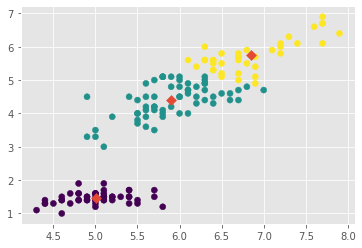

In [7]:
xs = iris_sample[:,0] # sepal lengh
ys = iris_sample[:,2] # petal length

plt.scatter(xs,ys,c=labels) #color by cluster label

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,2]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker="D",s=50)

plt.show()



In [6]:
centroids

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### 17.1 Evaluating the qualify of a clustering

A direct approach is to compare the clusters with correspondence (e.g. iris species).       
For iris data set, k-means found 3 clusters amongst the iris sample, and we can check do the clusters correspond to the species. Clusters vs species is a "cross-tabulation".      

Another problem is to how to measure the quality of a clustering in a way that doesn't require our samples to come pre-grouped into species. Because in most datasets, the samples are not labelled by species. Once we do that, this measure of quality can then be used to to make an informed choice about the number of clusters to look for.     

We need a way to measure the quality of a clustering that uses only the clusters and the samples themselves.       
A good clustering has tight clusters, meaning the samples in each cluter are bunced together, not spread out.     

**inertia**: a measure of how spread out the samples within each cluster are. Intuitively, inertia measures how far samples are from their centroids. We want clusters that are not spread out, so lower values of the interia are better. The inertia of a kmeans model is measured automatically when any of the the fit methods are called, and is availabe afterwards as the inertia attribute. In fact, kmeans aims to place clusters ina way that minimises the inertia.    

Usually the inertia decreases with increasing number of cluster defined.      

A good cluster has tight cluster (i.e. low inertia) but it also doesn't have too many clusters. A good rule is where inertia begins to decrease more slowly. 

In [18]:
iris_target_list = iris.target.tolist()
dict_iris = {0:"setosa",1:"versicolor",2:"virginca"}
iris_target_string_list = [dict_iris[x] for x in iris_target_list]

In [20]:
#create cross-tabulation
#1st col: labels predicted (training set)
#2nd col: true label from training set
# so each row is a cluster label and species of a single sample
df_crosstable = pd.DataFrame({"labels":labels, "species":iris_target_string_list})
print(df_crosstable)
ct = pd.crosstab(df_crosstable["labels"],df_crosstable["species"])
print(ct)

     labels   species
0         0    setosa
1         0    setosa
2         0    setosa
3         0    setosa
4         0    setosa
..      ...       ...
145       2  virginca
146       1  virginca
147       2  virginca
148       2  virginca
149       1  virginca

[150 rows x 2 columns]
species  setosa  versicolor  virginca
labels                               
0            50           0         0
1             0          48        14
2             0           2        36


## Example: how many clusters of grain ?

You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

In [3]:
df_grain=pd.read_csv("../Machine_Learning_basics/data/Grains/seeds.csv",header=None,usecols = [i for i in range(7)])
df_grain.head()

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [4]:
grain_array = df_grain.values

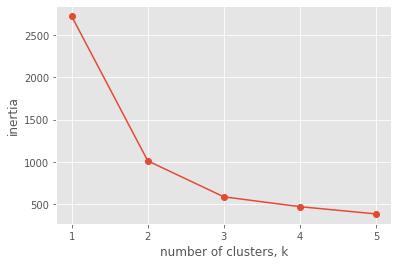

In [35]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(grain_array)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [7]:
df_grain_label=pd.read_csv("../Machine_Learning_basics/data/Grains/seeds.csv",header=None,usecols = [7],squeeze=True)
grain_label_list = df_grain_label.values.tolist()
dict_grain = {1:"Kama wheat",2:"Rosa wheat",3:"Canadian wheat"}
grain_label_string_list = [dict_grain[x] for x in grain_label_list]

In [49]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
# .fit_predict is same as .fit() then .predict()
labels = model.fit_predict(grain_array)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': grain_label_string_list})

# Create crosstab: ct
ct = pd.crosstab(df["labels"],df["varieties"])

# Display ct
print(ct)



varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       2          60          10
1                       0           1          60
2                      68           9           0


### 17.2 Transforming features for better clusterings

If the features of the dataset have very different variances (spread of its values), then we will have a problem to cluster dataset.       

In Kmeans clustering, the variance of a feture corresponds to its influence on the clustering algorithm. To give every feature a chance, the data needs to be transformed so that features have equal variance.      

**StandardScaler** transforms each feature to have mean 0 and variance 1.     

You can create a StandardScaler object and use its .fit() method to fit it to the samples (training set). The transform method of this object can be used to standardize any samples (the same old training set, or new ones).     

StandardScaler transforms the data, so use fit()/transform() method, (or fit_transform())            
KMeans assigns cluster labels to sample with prediction, so use fit()/predict() method, (or fit_predict())        

Similiar to StandardScaler, other preprocess method incluses **Normalizer**,  which rescales each sample independently of the other.

In [17]:
df_fish_sample = pd.read_csv("../Machine_Learning_basics/data/fish.csv",header=None,usecols=[1,2,3,4,5,6])
fish_sample_array = df_fish_sample.values

In [6]:
df_fish_label = pd.read_csv("../Machine_Learning_basics/data/fish.csv",header=None,usecols=[0],squeeze=True)
fish_label_list = df_fish_label.tolist()

In [62]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)


In [63]:
# Fit the pipeline to samples
pipeline.fit(fish_sample_array)

# Calculate the cluster labels: labels
labels = pipeline.predict(fish_sample_array)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({"labels":labels,"species":fish_label_list})

# Create crosstab: ct
ct = pd.crosstab(df["labels"],df["species"])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0     0      0     13
2            0    17      0      0
3            1     0     19      1


In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). The daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day is given.         

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

In [3]:
df_stock_value = pd.read_csv("../Machine_Learning_basics/data/company-stock-movements-2010-2015-incl.csv").iloc[:, 1:]
#print(df_stock_value.head())
stock_value_array = df_stock_value.values

In [4]:
df_stock_company = pd.read_csv("../Machine_Learning_basics/data/company-stock-movements-2010-2015-incl.csv",usecols=[0],squeeze=True)
stock_company_list = df_stock_company.tolist()

In [78]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(stock_value_array)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [79]:
# which companys moves together ?

# Predict the cluster labels: labels
labels = pipeline.predict(stock_value_array)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': stock_company_list})

# Display df sorted by cluster label
print(df.sort_values("labels"))

    labels                           companies
29       0                     Lookheed Martin
50       0  Taiwan Semiconductor Manufacturing
36       0                    Northrop Grumman
30       0                          MasterCard
20       0                          Home Depot
59       0                               Yahoo
3        0                    American express
4        0                              Boeing
28       1                           Coca Cola
9        1                   Colgate-Palmolive
31       1                           McDonalds
38       1                               Pepsi
41       1                       Philip Morris
26       2                      JPMorgan Chase
22       2                                  HP
18       2                       Goldman Sachs
5        2                     Bank of America
15       2                                Ford
1        2                                 AIG
55       2                         Wells Fargo
34       3   

## 18. Unsupervised technique for visualisations



### 18.1 Hierarchical clustering

Living things can be organised into small narrow groups, e.g. human, apes, snakes or into larger broader group like mammals and reptiles or even broader groups like animal and plants. These groups contains one another and form a hierarchy.    


Analogously, hierarchical clustering arranges samples into a hierarchy of clusters.    

Hierarchical clustering can organise any sort of data into a hierarchy, not just samples of plants and animals.      

For one example, we consider Eurovision scoring dataset, where contries gave scores to songs performed at the Eurovision 2016. It is 2D array of scores: rows are countries, cols are songs.     

The result of applying hierarchical clustering to the Eurovision scores can be visualised as a tree-like diagram called a "dendrogram".    

Hierarchical clustering proceeds in steps:    
1) every country is its own cluster: there are as many clusters as there are countries     
2) at each step, the two closest clusters are merged       
3) continue until there is only one cluster left, and it contains all the countries      

This particular type of hierarchical clustering is called "agglomerative" (the opposite is called "divisive clustering").     



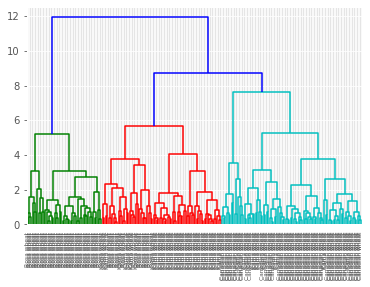

In [85]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(grain_array, method = "complete") #this function performs hierarchical clustering
dendrogram(mergings, labels = grain_label_string_list, leaf_rotation = 90, leaf_font_size=6)
plt.show()

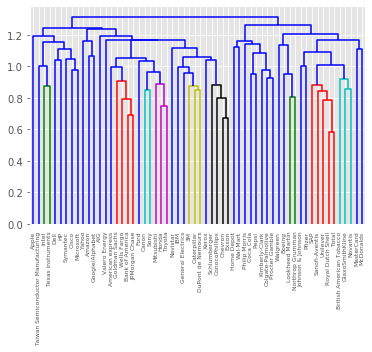

In [32]:
# another example on stock
#  SciPy hierarchical clustering doesn't fit into a sklearn pipeline, 
# so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(stock_value_array)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method="complete")

# Plot the dendrogram
dendrogram(mergings, labels = stock_company_list, leaf_rotation = 90, leaf_font_size=6)
plt.show()


## 18.1.1 Cluster labels in hierarchical clustering

Hierarachical clustering is not only a visualisation tools, the cluster labels at any intermediate stage can be recovered. These cluster labels can then be used in further computation, such as cross tabulation, just like the cluster labels from k-means.      

An intermediate stage in the hierarchical clustering is specified by choosing a height on the dendrogram. This height can be checked on the dendrogram on the y-axis. An joint below the height are belong to the clustering.      

What is the meaning of the height?       
The y-axis of the dendrogram encodes the distance between merging clusters.     

Height on dendrogram specifies maximum distance between merging clusters. The height that specifies an intermediate clustering corresponds to a distance. This specifies that the hierarchical clustering should stop merging clusters when all clusters are at least this far apart.     

The distance between two clusters is measured using a "linkage method". Here we used "complete" linkage, where the distance between two clusters is the maximum of the distance between their samples. i.e. In complete linkage, the distance between clusters is the distance between the furthest points of the clusters.           

The cluster labels for any intermediate stage of the hierarchical clustering can be extracted using fcluster function. It returns a NumPy array of cluster labels. 

In [13]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram

# Normalize the movements: normalized_movements
normalized_movements = normalize(stock_value_array)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method="complete")

from scipy.cluster.hierarchy import fcluster

#return array containing the cluster labels for the company
cluster_labels = fcluster(mergings, 1.2,criterion="distance")
print(cluster_labels)

# to inspace the cluster labels, we need alght cluster labels with company name
pairs = pd.DataFrame({"labels":cluster_labels, "company":stock_company_list})

print(pairs.sort_values("labels"))

[1 3 2 3 5 3 6 3 3 4 3 1 3 3 1 3 3 2 3 6 4 3 1 3 1 6 3 4 4 5 6 6 3 1 3 3 5
 6 4 6 4 4 6 6 3 3 6 1 3 6 1 1 6 3 5 3 4 3 3 2]
    labels                             company
0        1                               Apple
51       1                   Texas instruments
50       1  Taiwan Semiconductor Manufacturing
47       1                            Symantec
33       1                           Microsoft
24       1                               Intel
22       1                                  HP
14       1                                Dell
11       1                               Cisco
17       2                     Google/Alphabet
59       2                               Yahoo
2        2                              Amazon
35       3                            Navistar
44       3                        Schlumberger
10       3                      ConocoPhillips
34       3                          Mitsubishi
45       3                                Sony
32       3                     

In [21]:
#grain example again, at height = 8 there are 3 cluster
# we get the cluster label for this intermediate clustering, and comapre with labels witht eh grain varietid using cross
#tabulation
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(grain_array, method = "complete") #this function performs hierarchical clustering
# Use fcluster to extract labels: labels
grain_labels = fcluster(mergings,8,criterion="distance")

# Create a DataFrame with labels and varieties as columns: df
df_grain_compare = pd.DataFrame({'labels': grain_labels, 'varieties': grain_label_string_list})

# Create crosstab: ct
ct = pd.crosstab(df_grain_compare["labels"],df_grain_compare["varieties"])

# Display ct
print(df_grain_compare)
print(ct)



     labels       varieties
0         2      Kama wheat
1         2      Kama wheat
2         2      Kama wheat
3         2      Kama wheat
4         2      Kama wheat
..      ...             ...
205       3  Canadian wheat
206       3  Canadian wheat
207       3  Canadian wheat
208       3  Canadian wheat
209       3  Canadian wheat

[210 rows x 2 columns]
varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      70          18           0


### 18.2 t-SNE 

Stands for: t-distributed stochastic neightbor embedding      

It maps samples from their high-dimensional space into a 2-d or 3d- space so they can be visualised.    

Creates a 2D map of a dataset and converys useful information about the proximity of the samples to one another.       

Map approximately preserves nearness of samples.      

e.g. iris dataset has 4 measurement, therefore the samples are 4-dimensional.    
t-SNE was given only the measurements of the iris samples, and in particular it wasn't given any information about the three species of iris. If we color species differently on the scatter plot, we see that t-SNE has kept the species separate.      
"versicolor and "virginica" is harder to distinguish from one another.      

t-SNE has only fit_transform() method, no separate method -> you cannot extend the map to include new data samples.     

The learning rate makes the use of t-SNE more complicated than some other techniques, this number needs to be tuned:        
wrong choice: points bunch together in the scatter plot, usually the values is between 50-200.     

The axis of a t-SNE plot do not have any interpretable meaning. **The graph change each time with same code and data**       
The variatey (or color) have same position relative to one another.     



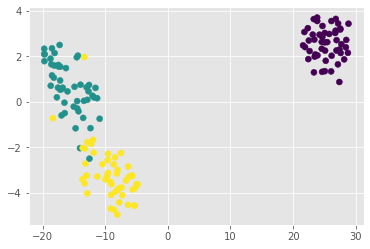

In [31]:
# iris dataset preloaded
#iris.data #feature, 4D
#iris.target # target label

from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)

transformed = model.fit_transform(iris.data)

xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs,ys,c=iris.target)

plt.show()


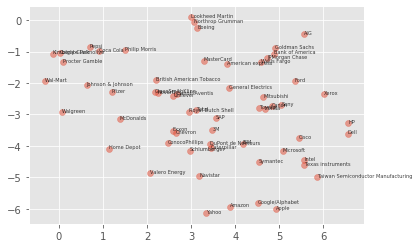

In [33]:
# company stocks

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, stock_company_list):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()


## 19. Dimension reduction

Dimension reduction finds patterns in data, and uses these patterns to re-express it in a compressed form. This makes subsequent computation with the data much more efficient.     

The most important function of dimension reduction is to reduct a dataset to its"bare bones", discarding noisy features that cause big problems for supervised learning tasks like regression and classification. In many real-wrold applications, it's dimension reduction that makes prediction possible.     



## 20. Principal Component Analysis (PCA)

One of the most fundamental of dimension reduction technique.     
PCA performs dimension reduction in 2 steps:     
1) decorrelation: does not change the dimension of the data at all.      
2) reduce dimension     

In the first step, PCA rotates the samples so that they are aligned with the coordinate axes. PCA also shifts the samples so that they have mean zero.     

scikit-learn has an implementation of PCS, and it has .fit() and .transform() method just like StandarScaler.      

The .fit() method learns how to shift and how to rotate the samples, but doesn't actually change them.      
The .transform() method applies the transformation that .fit() learned, the .tranform() method can be applied to new, unseen samples.     

After the model is being fit and transformed, it will return an array of transformed samples. This new array has the same number of rows and columns as the original sample arra. There is 1 row for each transformed sample. The columns of the new array correspond to "PCA feature", just as the original features corresponded to columns of the original array.     

PCA features are **NOT** correlated:      
It is often the case that the features of a dataset are correlated. However, PCA, due to the rotation it performs, decorrelates the data, in the sense that the columns of the transfomred array are not lienarly correlated. (if plotted out in 2D of two features, originally these two might be linearly correlated, after transformation the data points will be bunched near the original, since mean = 0 and not linaerly correlated)     

Linaer correlation can be measured with the Pearson correlation. (-1 to 1, 0 means no linaer correlation).     

PCA learns the "principle components" of the data. These are the directions in which the samples vary the most. It is the pricipal components that PCA aligns with the coordiate axes. After PCA model has been fit, the priciple compinents are available as the components_ attribute. It is a numpu array with one row for each pricipal component. (if two principal components are present, there will be 2 rows).    



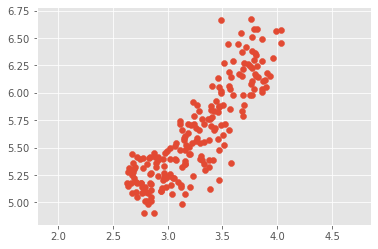

0.8604149377143466


In [15]:
# width and length of samples of grain. 
# You suspect that width and length will be correlated. 
# To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.
df_grain_small=pd.read_csv("../Machine_Learning_basics/data/Grains/seeds.csv",header=None,usecols = [3,4])
columnsTitles=[4,3]
df_grain_small=df_grain_small.reindex(columns=columnsTitles)
grain_array_small = df_grain_small.values
#print(grain_array_small)
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grain_array_small[:,0]

# Assign the 1st column of grains: length
length = grain_array_small[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

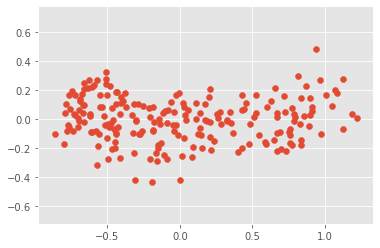

1.3877787807814457e-16


In [16]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grain_array_small)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

### 20.1 Intrinsic dimension of data

Consider the dataset with two features: latitude and longitude. These two features might track the flight of an airplane, for example. This dataset is 2D, yet it turns out that it can be closely, approximated using only one feature: the displacement along the flight path. This dataset is intrinsicaly 1D.     

The **intrisic dimension** of a dataset is the number of features required to approximate the dataset.        

The intrisic dimension informs dimension reduction (essential idea), because it tells us how muc a dataset can be compressed. i.e. what is the most compact representation of the samples ?       

This intrinsic dimension can be detected with PCA.     

For a quick example, if we look at the iris data set, in particular, the 3 features (sepal length, sepal width, and petal width) of the versicolor species. If we plot a 3D scatter diagram (with each sample as a point in the 3D plot) (axis: x:sepal length, y:sepal width,z:petal width), then we see that the point cluster is flat (like a sheet) in shape. This means the these data do not vary alot in the z-axis (petal width). This means the data can be approximated by using only two coordinates, without losing much information. So this dataset has intrinsic dimension 2.     

Scatter plots work if samples have 3 features or less (3D or less). If we have lot of features, we cannot visualise on a scatter plot.      

PCA identifies intrinsic dimension when samples have any number of features.    

Intrinsic dimension = number of PCS features with significant variance.     

If apply PCA on the iris versicolor 3D dataset, we will obtain 3 PCA feature with variance of 0.3,0.06 and 0.01, essentially we can count two of them and discard the smallest feature.    

PCA is not alway unambiguous ! Variance between PCA features can be close !


[[ 0.63910027  0.76912343]
 [-0.76912343  0.63910027]]


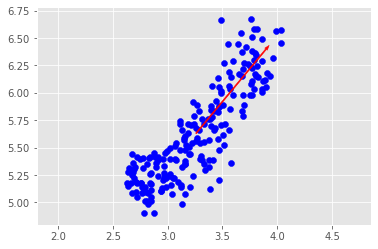

In [20]:
# The first principal component of the data is the direction in which the data varies the most. 
# In this exercise, your job is to use PCA to find the first principal component of the length and width 
# measurements of the grain samples, and represent it as an arrow on the scatter plot.

# Make a scatter plot of the untransformed points
plt.scatter(grain_array_small[:,0], grain_array_small[:,1],color="blue")

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grain_array_small)

# Get the mean of the grain samples: mean
# Extract the coordinates of the mean of the data using the .mean_ attribute of model
mean = model.mean_

print(model.components_)
# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
# plt.arrow(x, y, dx, dy, **kwargs)
# This draws an arrow from (x, y) to (x+dx, y+dy)
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

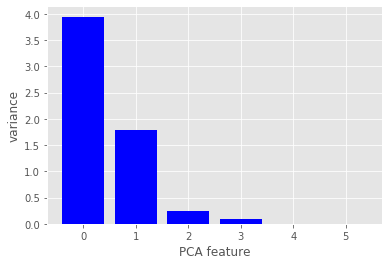

In [22]:
# The fish dataset is 6-dimensional. But what is its intrinsic dimension? 
# Make a plot of the variances of the PCA features to find out
# You'll need to standardize the features first

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(fish_sample_array)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_, color="blue")
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
# looks like fish data set has 2 intrinsic dimension

### 20.2 Dimension reduction with PCA

Dimension reduction represents the same data, using less features, and is vita for building machine learning pipelines using real-world data.    

PCA features are in decreasing order of variance. PCA performs dimension reduction by discarding the PCA features with lower variance, which it assumes to be noise, and retaining the higher variance PCA features, which it assumes to be informative.    

To use PCA for dimension reduction, you need to specify how many PCA features to keep.    
e.g. PCA(n_components=2) when creating a PCA model tells it to keep only the first 2 PCA features.    
A good choice is the intrinsic dimension of the dataset, if you know it.    

For iris dataset (full), we have 4 features represeting the 4 measurements, 3 species. We can use PCA to reduce the dimension of the iris dataset to only 2. From graph below, we see that important information preserved: species remain distinct.     

Like all assumption, there are cases where it does not hold (low PCA variance = noise, high PCA variance = info).       
Assumption typically holds for practice.     

In some case, an alternative implementation of PCA needs to be used. e.g. in word frequency array. In such a dataset, each row corresponds to a document, and each column corresponds to a word from a fixed vocabulary. The entris of the word-frequency array measure how often each word appears in each document. Only some of the words from the vocab appear in any one document, so most entries of the word frequency array are 0. Arrays like this are said to be sparse and often represented using a special type of array called a "csr_matrix". csr_matrix save space by rememebering only the non-zero entries of the array. (scipy.sparse.csr_matrix)      

scikit-learn's PCA doesn't support csr_matrix, and we will need to use scikit-learn TruncatedSVD instead. TruncatedSVD performs the same transformation as PCA, but accepts csr_matrices as input.



(150, 2)


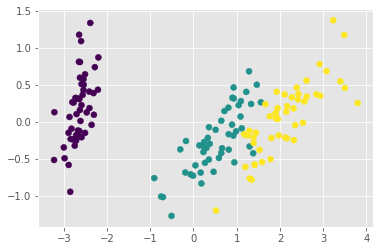

In [26]:
#iris.data
#iris.target
pca = PCA(n_components=2)
pca.fit(iris.data)
transformed = pca.transform(iris.data)
print(transformed.shape)
#we see there are only two features, as specified

xs = transformed[:,0]
ys = transformed[:,1]

#plot and show the 2 PCA features
#reduct dimension from 4 -> 2, species can still be distinguished, (from graph, there is no clustering performed here)
# meaning the dataset after reduction can still be clustered (and not mixed up after transformation)

plt.scatter(xs,ys,c=iris.target)
plt.show()

**A tf-idf word-frequency array**    

In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.     

tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection.     

The number of times a term occurs in a document is called its **term frequency**. 
Because the term "the" is so common, term frequency will tend to incorrectly emphasize documents which happen to use the word "the" more frequently, without giving enough weight to the more meaningful terms "brown" and "cow". The term "the" is not a good keyword to distinguish relevant and non-relevant documents and terms, unlike the less-common words "brown" and "cow". Hence an **inverse document frequency** factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.


In [27]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

documents= ['cats say meow', 'dogs say woof', 'dogs chase cats']
# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
# This is a word-frequency array in csr_matrix format
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
# The columns of the array correspond to words. 
# rows correspond to item in documents list
# Get the list of words by calling the .get_feature_names() method of tfidf
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


## Example: Clustering Widipedia

Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia

In [28]:
import pandas as pd
from scipy.sparse import csr_matrix

#The reason for taking this transpose is that without it, there would be 13,000 columns 
# (corresponding to the 13,000 words in the file), which is a lot of columns for a CSV to have.
 # we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer
df = pd.read_csv('../Machine_Learning_basics/data/Wikipedia articles/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [29]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

In [30]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values("label"))

    label                                        article
48      0                                     Gabapentin
47      0                                          Fever
46      0                                     Prednisone
45      0                                    Hepatitis C
44      0                                           Gout
43      0                                       Leukemia
42      0                                    Doxycycline
41      0                                    Hepatitis B
40      0                                    Tonsillitis
49      0                                       Lymphoma
39      1                                  Franck Ribéry
30      1                  France national football team
31      1                              Cristiano Ronaldo
32      1                                   Arsenal F.C.
33      1                                 Radamel Falcao
34      1                             Zlatan Ibrahimović
35      1                Colomb

array([[ 242. ,   23.2,   25.4,   30. ,   38.4,   13.4],
       [ 290. ,   24. ,   26.3,   31.2,   40. ,   13.8],
       [ 340. ,   23.9,   26.5,   31.1,   39.8,   15.1],
       [ 363. ,   26.3,   29. ,   33.5,   38. ,   13.3],
       [ 430. ,   26.5,   29. ,   34. ,   36.6,   15.1],
       [ 450. ,   26.8,   29.7,   34.7,   39.2,   14.2],
       [ 500. ,   26.8,   29.7,   34.5,   41.1,   15.3],
       [ 390. ,   27.6,   30. ,   35. ,   36.2,   13.4],
       [ 450. ,   27.6,   30. ,   35.1,   39.9,   13.8],
       [ 500. ,   28.5,   30.7,   36.2,   39.3,   13.7],
       [ 475. ,   28.4,   31. ,   36.2,   39.4,   14.1],
       [ 500. ,   28.7,   31. ,   36.2,   39.7,   13.3],
       [ 500. ,   29.1,   31.5,   36.4,   37.8,   12. ],
       [ 600. ,   29.4,   32. ,   37.2,   40.2,   13.9],
       [ 600. ,   29.4,   32. ,   37.2,   41.5,   15. ],
       [ 700. ,   30.4,   33. ,   38.3,   38.8,   13.8],
       [ 700. ,   30.4,   33. ,   38.5,   38.8,   13.5],
       [ 610. ,   30.9,   33.5,